## Analysis
Three brief observations from the data below.

#### A breakdown of promising figures from the Capomulin and Ramicane
The analysis as requested is severely lacking for reasons I will get into below, but despite results that are in many ways murky, Capomulin and Ramicane still stand out as outliers.

First the relatively large number of measurements acquired in and of itself suggest the mice receiving these treatments lived longer than mice receiving other treatments. This in and of itself would be somewhat promising, but when compared to the final tumor size of other promising treatments we see they also show an extreme decrease in tumor volume. Ramicane's and Capomulin's final tumor volume are about 60% of the size of Infubinol and Ceftamin! That certainly has enough statiscal significance to warrant further study. However, there are serious concerns for Capomulin that must be looked into.

#### Capomulin's concerning final figures
Included below is an analysis of mine that show's Capomulin's longterm effectiveness is in question. When reviewing the data a large number of Capomulin's mice saw an increase in the final size of their tumor when compared to the second to last measurement. Printing out the cumulative results is shocking:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th></th>
      <th>Capomulin</th>
      <th>Ramicane</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Percent Increasing</th>
      <td>0.72</td>
      <td>0.36</td>
    </tr>
  </tbody>
</table>
Note this does not even account for cases where the increase began at some earlier timepoint and the final datapoint experienced a statistically insignificant dip! Ramicane shows the majority still decreasing at the final point of the study. A longer term study must be done to ensure that this increase isn't permanent and the effects of Capomulin ultimately prove ephemeral.

#### Problems with the analysis
Ultimately, this analysis is lacking in several key ways, but one in particular: an analysis of the placebo was not included alongside our later analyses making observations literally baseless. Without an understanding of the stistical difference between Ramicane, Capomulin, and the placebo it is extremely difficult to draw reasonable conclusions on their effectiveness, and our analysis is rendered largely meaningless. Our samples simply are not large enough (24/25 mice per drug regimen) to tell at a glance whether the extreme performance of Capomulin or Ramicane has statistical significance. Considering the breadth of drugs tested it would be unsurprising to have one or two well performing groups even if ALL were treated with placebos.


In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [2]:
#data initialization
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')
data['Mouse ID'].nunique()

249

In [4]:
#grouping by mouse id and timepoint then locating all with value greater than 1
tps = data.groupby(['Mouse ID'])['Timepoint'].value_counts().loc[lambda x : x > 1]
#looping through indexes to get ids then putting them in a set to only have each entry once
duplicates = {i[0] for i in (tps.index)}
data.loc[data['Mouse ID'].isin(duplicates)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#using that set of duplicates to get indices and drop rows
data.drop(data.index[data['Mouse ID'].isin(duplicates)], inplace = True)
data.reset_index(inplace = True)


In [29]:
#first creating a groupby object, them concatting the stats I want all at once instead of merging one at a time
tv_by_dr = data[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')
tv_summary = pd.concat([tv_by_dr.mean(),tv_by_dr.median(),tv_by_dr.var(),tv_by_dr.std(),tv_by_dr.sem()], axis = 1)
tv_summary.columns = ['Volume Mean', 'Volume Median', 'Volume Variance', 'Volume Standard Deviation', 'Volume Standard Error']
tv_summary

,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation,Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
#Using agg instead
tv_summary = tv_by_dr.agg(['mean', 'median', 'var', 'std', 'sem'])
tv_summary.columns = ["Volume " + i[1].title() for i in tv_summary.columns]
tv_summary

,Volume Mean,Volume Median,Volume Var,Volume Std,Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


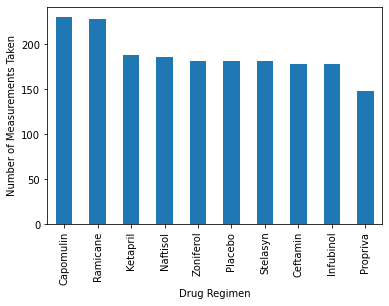

In [47]:
#plotted with pandas.plot
tp_by_dr = data[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count() \ 
                                             .sort_values(by = 'Timepoint', ascending = False)
plt.ylabel("Number of Measurements Taken")
tp_by_dr['Timepoint'].plot(kind = 'bar')
plt.show()



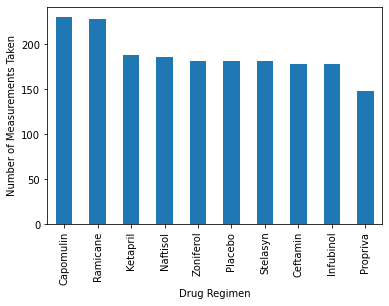

In [46]:
#plotted with matplotlib with tweaks to exactly match above chart
x_axis = [i for i in range(len(tp_by_dr.values))]
timecounts = tp_by_dr.values[:,0]
plt.bar(x_axis, timecounts, width = .5)
plt.xticks(x_axis, tp_by_dr.index, rotation=90)
plt.xlim(-0.5, len(x_axis)-0.5)
plt.xlabel('Drug Regimen')
plt.ylabel("Number of Measurements Taken")
plt.show()

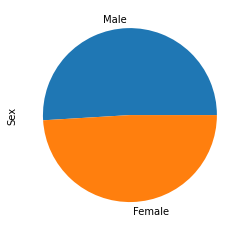

In [17]:
#sex plotted with pandas.plot
data['Sex'].value_counts().plot(kind = 'pie')
plt.show()

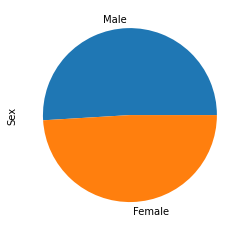

In [18]:
#sex plotted with matplotlib
plt.pie(data['Sex'].value_counts(), labels = data['Sex'].value_counts().index)
plt.ylabel('Sex')
plt.show()

In [20]:
#groupby mouseid and get final tumor volume
last_timepoint = data[['Mouse ID','Tumor Volume (mm3)']].groupby('Mouse ID').last()
last_timepoint.reset_index(inplace = True)
#create new simplified dataframe by merging left on last_timepoint, filtering out all other rows
simple_df = pd.merge(last_timepoint, data, how = 'left', left_on = ['Mouse ID', 'Tumor Volume (mm3)'], right_on=['Mouse ID', 'Tumor Volume (mm3)'])


In [21]:
#function to calculate qunatiles, iqr, upper and lower bounds and return potential outliers
def getoutliers(x):
    outliers = []
    quant = x.quantile([.25,.5,.75])
    iqr = quant[.75]-quant[.25]
    for i in x:
        if (i < quant[.25] - (1.5 * iqr)) or (i > quant[.75] + (1.5 * iqr)):
            outliers.append(i)
    return outliers
    

In [53]:
good_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumorvols = []
#loop through drugs we want to test, append list of tumor volumes to tumorvols and pass to getoutliers
#Appending to tumorvols makes boxplot easy
for i in range(len(good_drugs)):
    tumorvols.append(simple_df.loc[simple_df['Drug Regimen'] == good_drugs[i]]['Tumor Volume (mm3)'])
    outliers = getoutliers(tumorvols[i])
    if outliers:
        print(f"Potential outliers for {good_drugs[i]}: {outliers}")
    else:
        print(f"No outliers detected for {good_drugs[i]}")

No outliers detected for Capomulin
No outliers detected for Ramicane
Potential outliers for Infubinol: [36.321345799999996]
No outliers detected for Ceftamin


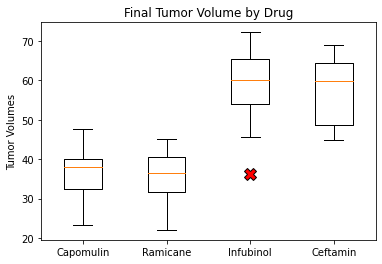

In [55]:
#make boxplots for each drug regimen, use dictionary definition of redx to mark outliers,
#reusing tumorvols array from above makes boxplot trivial
fig, ax = plt.subplots()
redx = {'markerfacecolor':'r', 'marker':'X', 'markersize':12}
ax.boxplot(tumorvols, flierprops=redx)
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_title("Final Tumor Volume by Drug")
ax.set_ylabel("Tumor Volumes")
plt.show()

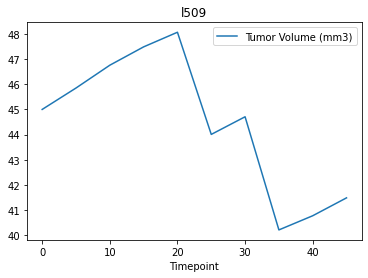

In [57]:
#First filtering for Capomulin then grouping by Mouse ID and Timepoint
data_by_mouse = data.loc[data['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']] \
                    .groupby(['Mouse ID', 'Timepoint']).sum()
#again using set to filter out multiple instances of a given mouse id then converting to list to 
#be able to iterate through it
mouse_ids = list({i[0] for i in data_by_mouse.index})

#getmouse takes string or index number and returns series of tumorvols associated with that mouse
def getmouse(x):
    if type(x) == int:
        if x > len(mouse_ids) or x < 0:
            return None
        return data_by_mouse.loc[mouse_ids[x]]
    if type(x) == str:
        if x not in mouse_ids:
            return None
        return data_by_mouse.loc[x]

#doing for one mouse but you could loop through mice as well using getmouse
getmouse('l509').plot(kind = 'line', title = 'l509')
plt.show()

In [56]:
#Getting series of weight by mouse then average tumorvol by mouse
xaxis = data.loc[data['Drug Regimen'] == 'Capomulin'][['Mouse ID','Weight (g)']].groupby('Mouse ID').mean()['Weight (g)']
yaxis = data.loc[data['Drug Regimen'] == 'Capomulin'][['Mouse ID','Tumor Volume (mm3)']].groupby('Mouse ID').mean()['Tumor Volume (mm3)']

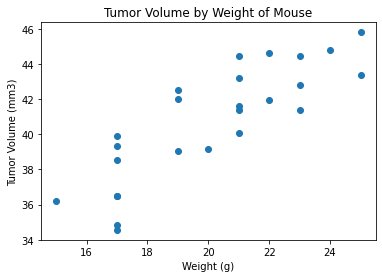

In [89]:
#using weights and average tumor vol to make scatter plot
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Weight (g)')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_title('Tumor Volume by Weight of Mouse')
ax2.scatter(xaxis, yaxis)
plt.show()

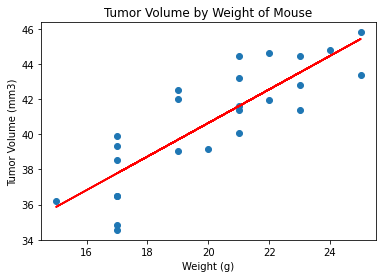

In [92]:
#Redoing scatter plot with linear regression showing
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
regression = xaxis * slope + intercept
ax2.plot(xaxis, regression, "r-")
fig2

In [112]:
#An additional anlysis from data I found concerning. This compares the tumor volume at the 
#second to last timepoint to the last timepoint for capomulin and returns the percent increasing
#First filtering for Capomulin  and Ramicane then grouping by Mouse ID and Timepoint

columns = ['Capomulin', 'Ramicane']
percents = []

for drug in columns:
    up = 0
    data_by_mouse = data.loc[data['Drug Regimen'] == drug][['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']] \
                    .groupby(['Mouse ID', 'Timepoint']).sum()
    mouse_ids = list({i[0] for i in data_by_mouse.index})
    for i in mouse_ids:
        df = getmouse(i)
        if df.iloc[-2]['Tumor Volume (mm3)'] < df.iloc[-1]['Tumor Volume (mm3)']:
            up += 1
    percents.append(up/len(mouse_ids))
pd.DataFrame({columns[0] : percents[0], columns[1] : percents[1]}, index = ['Percent Increasing'])
        


,Capomulin,Ramicane
Percent Increasing,0.72,0.36
